<a href="https://colab.research.google.com/github/ZhangEnsure/pytorch-d2l-zh/blob/master/3.%E7%8E%B0%E4%BB%A3%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/nin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

我们本次同样使用 [colab](https://colab.research.google.com/) 平台运行，运行之前需要安装配置环境。

In [ ]:
%pip install d2l
%pip install matplotlib_inline
%pip install matplotlib==3.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
from torch import nn
from d2l import torch as d2l
import torchvision
from torchvision import transforms 
from torch.utils import data

In [4]:
def nin_block(in_channels, out_channels, kernel_size, strides, padding):
  return nn.Sequential(
      nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
      nn.ReLU(),
      # 两个 1*1 卷积层加上激活函数构成非线性层
      nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
      nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

In [5]:
net = nn.Sequential(
  nin_block(1, 96, kernel_size=11, strides=4, padding=0),
  nn.MaxPool2d(3, stride=2),
  nin_block(96, 256, kernel_size=5, strides=1, padding=2),
  nn.MaxPool2d(3, stride=2),
  nin_block(256, 384, kernel_size=3, strides=1, padding=1),
  nn.MaxPool2d(3, stride=2),
  nn.Dropout(0.5),
  nin_block(384, 10, kernel_size=3, strides=1, padding=1),
  nn.AdaptiveAvgPool2d((1, 1)),
  nn.Flatten())

In [6]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


In [7]:
def load_data_fashion_mnist(batch_size, resize=None):
  """下载Fashion-MNIST数据集，然后将其加载到内存中
  Defined in :numref:`sec_fashion_mnist`"""
  trans = [transforms.ToTensor()]
  if resize:
      trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
      root="./drive/MyDrive/Notebooks/data", train=True, transform=trans, download=True)
  mnist_test = torchvision.datasets.FashionMNIST(
      root="./drive/MyDrive/Notebooks/data", train=False, transform=trans, download=True)
  return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                          num_workers=2),
          data.DataLoader(mnist_test, batch_size, shuffle=False,
                          num_workers=2))

In [8]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)

loss 0.795, train acc 0.699, test acc 0.692
1011.7 examples/sec on cuda:0


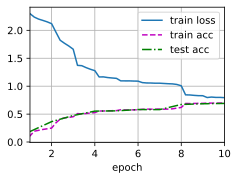

In [9]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())